# Topic Extraction in Newsfeeds
* Autor: Prof. Dr. Johannes Maucher
* Datum: 17.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __RSS Feeds:__ Struktur von RSS Feeds analysieren und parsen mit dem _Universal Feed Parser_. 
* __Dokument Analyse:__ Die Häufigkeit aller Worte in einem Dokument (Inhalt des RSS Feeds) zählen und in einem Array verwalten. 
* __Merkmalsextraktion:__ Bestimmung von Merkmalen (hier auch: __Topics__) (Allgemein spricht man von Merkmalen. Im Fall, dass die NNMF auf Dokumente angewandt wird, werden die Merkmale auch mit __Topics__ oder __Themen__ bezeichnet) mit der \emph{Non Negative Matrix Factorization}.
* __Zuordnung__: Wie setzen sich die Topics aus den Wörtern zusammen? Wie stark sind die gefundenen Topics in den Artikeln vertreten?
* __Dokument Clustering:__ Mit der NNMF kann auch ein Clustering realisiert werden. Jeder Topic repräsentiert ein Cluster. Jedes Dokument wird dem Cluster zugeordnet, dessen Topic am stärksten in ihm vertreten ist. 

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung

Stellen Sie sich vor Sie möchten in eine eigene Webseite die RSS Feeds einer Menge von Nachrichtenservern einbinden. Da die unterschiedlichen Server wahrscheinlich Artikel zu den gleichen Themen anbieten, werden die Inhalte einiger Artikel ähnlich sein. Mit der __Nicht Negativen Matrixfaktorisierung (NNMF)__ kann für eine große Menge von Dokumenten eine Menge von Themen (Topics) ermittelt werden, auf die sich die Dokumente beziehen. Damit ist es u.a. möglich
* die Dokumente thematisch zu ordnen
* zu jedem Thema nur ein Dokument anzuzeigen

### Ähnlichkeiten bestimmen und relevante Merkmale extrahieren

Eine Sammlung von Dokumenten - in diesem Versuch die Menge aller Nachrichten der angegebenen Feeds - kann in einer Artikel/Wort-Matrix repräsentiert werden. Jede Zeile dieser Matrix gehört zu einem Dokument. Für jedes Wort, das mindestens in einem der Dokumente vorkommt, ist eine Spalte vorgesehen. Das Matrixelement in Zeile $i$, Spalte $j$ beschreibt wie häufig das Wort in Spalte $j$ im zur Zeile $i$ gehörenden Dokument vorkommt.

Unter der Annahme, dass Artikel umso ähnlicher sind, je mehr Worte in diesen gemeinsam vorkommen, kann auf der Grundlage dieser Matrix die Ähnlichkeit zwischen den Artikeln berechnet werden. Hierzu könnte die Matrix z.B. einfach einem _Hierarchischen Clustering_ übergeben werden. Das hierarchische Clustering weist jedoch im Fall einer großen Menge von zu vergleichenden Objekten zwei wesentliche Nachteile auf: Erstens ist die wiederholte Berechnung der Distanzen zwischen allen Artikeln/Clustern extrem rechenaufwendig, zweitens ist die Darstellung einer großen Anzahl von Objekten im Dendrogramm nicht mehr übersichtlich. 

Für das Auffinden von Assoziationen zwischen Dokumenten hat sich in den letzten Jahren die Methode der __Nicht-Negativen Matrix Faktorisierung (NNMF)__ etabliert. Mit dieser Methode kann eine Menge von wesentlichen Merkmalen berechnet werden, anhand derer sich die Dokumente clustern lassen, d.h. Dokumente des gleichen Clusters repräsentieren das gleiche Merkmal (Thema). Ein solches Merkmal wird durch eine Menge von Worten beschrieben, z.B. $\{$ _Paris, terror, IS_ $\}$  oder $\{$_refugee, syria, border_ $\}$. Neben der Merkmalsextraktion stellt die relativ geringe Komplexität einen weiteren Vorteil der NNMF dar. Durch die Darstellung der Artikel/Wort-Matrix als Produkt von 2 Faktormatrizen müssen deutlich weniger Einträge gespeichert werden.

### Nicht Negative Matrixfaktorisierung: Die Idee

Die Artikel/Wort-Matrix wird im Folgenden mit $A$ bezeichnet. Sie besitzt $r$ Zeilen und $c$ Spalten, wobei $r$ die Anzahl der Artikel und $c$ die Anzahl der relevanten Worte in der Menge aller Artikel ist. Durch Multiplikation der Matrix $A$ mit dem Vektor $v$ (_wordvec_: Vektor der alle relevanten Worte enthält) werden die Worte den Artikeln $a$ (_articletitles_: Vektor der alle Artikeltitel enthält) zugeordnet:

$$
a=A*v.
$$

Die Idee der NNMF besteht darin die Matrix $A$ als Produkt zweier Matrizen $W$ und $H$ darzustellen,

$$
A=W*H
$$

wobei alle Elemente in $W$ und $H$ größer oder gleich Null sein müssen. Die Matrixmultiplikation erfordert, dass die Anzahl der Zeilen $m$ in $H$ gleich der Anzahl der Spalten in $W$ sein muss. 
Durch die Faktorisierung der Matrix $A$ wird die Zuordnung der Wörter des Wortvektors $v$  zu den Artikeln des Vektors $a$ in zwei Stufen zerlegt. 

$$
f = H*v
$$
$$
a = W*f 
$$

In der ersten Stufe werden durch die Multiplikation von $v$ mit der Matrix $H$ die Wörter einem sogenannten Merkmalsvektor $f$ mit $m$ Elementen zugewiesen. In der zweiten Stufe werden durch die Multiplikation des Merkmalsvektor $f$ mit der Matrix $W$ die einzelnen Merkmale den Artikeln in $a$ zugeordnet. Die Matrix $H$ definiert also aus welchen Wörtern die Merkmale gebildet werden. Sie wird deshalb __Merkmalsmatrix__ genannt. Die Matrix $W$ hingegen beschreibt mit welchem Gewicht die einzelnen Merkmale in den verschiedenen Artikeln auftreten. Sie wird deshalb __Gewichtungsmatrix__ genannt.

Daraus folgt: Wenn eine Faktorisierung der Matrix $A$ gefunden wird, dann werden damit auch relevante Merkmale, also die Themen, definiert, hinsichtlich derer die Artikel effizient kategorisiert werden. Durch die Matrixfaktorisierung wird eine __Merkmalsextraktion__ realisiert. 

### Berechnung der Matrixfaktoren

Für die Berechnung der Faktoren wurde in [Lee, Algortihms for Non-negative Matrix Factorisation](http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf) eine iterative Methode vorgestellt, die derzeit wohl am häufigsten angewandt wird und auch in dieser Übung implementiert werden soll. Der Algorithmus besteht aus folgenden Schritten:
* Gebe die zu faktorisierende Matrix $A$ ein. $r$ sei die Anzahl der Zeilen und $c$ die Anzahl der Spalten von $A$.
* Wähle die Anzahl $m$ der Merkmale, mit $m<c$. _Tipp:_ Für $m$ sollte zunächst ein Wert im Bereich $15$ bis $30$ gewählt werden.
* Lege eine $m \times c$ Matrix $H$ an mit initial zufälligen Elementen (Anwendung der numpy Funktion _random.random()_)
* Lege eine $r \times m$ Matrix $W$ an mit initial zufälligen Elementen (Anwendung der numpy Funktion _random.random()_)
* Wiederhole bis maximale Anzahl der Iteration erreicht oder Kosten $k$ unter vordefinierter Schwelle:

	* Berechne aktuelles Produkt $B=W*H$ und bereche die Kostenfunktion 
		$$
			k=\left\| A - B \right\|^2 = \sum\limits_{i,j} \left(A_{i,j} - B_{i,j}\right)^2
		$$ 
	* Anpassung der Matrix $H$ durch folgende Neuberechnung der Matrixelemente
    
		$$
		H_{i,j} := H_{i,j} \frac{(W^T*A)_{i,j}}{(W^T*W*H)_{i,j}}
		$$
        
	* __Nach__ der Anpassung der Matrix $H$: Anpassung der Matrix $W$ durch folgende Neuberechnung der Matrixelemente
    
		$$
		W_{l,i} := W_{l,i} \frac{(A*H^T)_{l,i}}{(W*H*H^T)_{l,i}}
		$$

In [Lee, Algortihms for Non-negative Matrix Factorisation](http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf) ist bewiesen, dass durch die o.g. Anpassungsroutinen die Kosten $k$ monoton abnehmen und in einem Minimum konvergieren. Der Algorithmus ist jedoch nicht optimal weil das gefundene Minimum ein lokales Minimum sein kann.

 ## Vor dem Versuch zu klärende Fragen
 
 * Was versteht man unter Artikel/Wort-Matrix? Wie wird diese im aktuellen Versuch gebildet?

|      | Spalte   |  1.  |   2. |
| ---- |:-------------:| -----:|
|Zeile | Doclist | 'wort1' | 'wort2' |
|   1.  | Doc1 |  1   |  0   | 
|   2.  | Doc2 |  0   |  0   | 
|   3.  | Doc3 |  0   |  0   |  

Jede Zeile dieser Matrix gehört zu einem Dokument. Für jedes Wort, das mindestens in einem der Dokumente vorkommt, ist eine Spalte vorgesehen. Das Matrixelement in Zeile  i, Spalte  j beschreibt wie häufig das Wort in Spalte j im zur Zeile i gehörenden Dokument vorkommt.

 
Gebildet wird diese Matrix in dem man eine bereinigte Liste aus allen Wörtern zu jedem Dokument erstellt wird. Zur Bereinigung zählen: Stoppwörter, Doppelte Wörter und Satzzeichen zu entfernen (Tokenizing). Außerdem das Normalisieren der Wortmenge. Diese Listen werden in einer Liste gespeichert.
Anschließend wird aus diesem Objekt ein Gensim-Dictionary erzeugt. Es besitzt nun die Eigenschaft, dass es jedem relevanten Wort (Key) einen zufälligen, eindeutigen  Index (Value) erzeugt. 


Um die Performance zu erhöhen wird die Efficient Corpus Representation eingesetzt. Dabei wird aus dem Dictionary eine Liste aus Tupeln erzeugt, wobei der erste Wert, der Indize des Wortes ist und der zweite Wert die Häufigkeit des Wortes repräsentiert. Dies bildet den Corpus.

* Wie multipliziert man die Matrix
    $$
    A= \left( \begin{array}{cccc}
a_{00} & a_{01} & a_{02} & a_{03} \\ 
a_{10} & a_{11} & a_{12} & a_{13} \\ 
a_{20} & a_{21} & a_{22} & a_{23}
\end{array} \right)
    $$
    mit dem Vektor  
    $$
    v=\left( \begin{array}{c}
v_{0} \\ 
v_{1} \\ 
v_{2} \\ 
v_{3}
\end{array} \right)
    $$
    

So multipliziert man die Matrix:
    $$
    a = A * v = \left( \begin{array}{cccc}
a_{00} & a_{01} & a_{02} & a_{03} \\ 
a_{10} & a_{11} & a_{12} & a_{13} \\ 
a_{20} & a_{21} & a_{22} & a_{23}
\end{array} \right)
     *    
\left( \begin{array}{c}
v_{0} \\ 
v_{1} \\ 
v_{2} \\ 
v_{3}
\end{array} \right)
     =
\left( \begin{array}{c}
a_{00}*v_{0} + a_{01}*v_{1} + a_{02}*v_{2} + a_{03}*v_{3}  \\ 
a_{10}*v_{0} + a_{11}*v_{1} + a_{12}*v_{2} + a_{13}*v_{3} \\ 
a_{20}*v_{0} + a_{21}*v_{1} + a_{22}*v_{2} + a_{23}*v_{3} \\ 
a_{30}*v_{0} + a_{31}*v_{1} + a_{32}*v_{2} + a_{33}*v_{3}
\end{array} \right)
    $$
    
Die Voraussetzung das zwei Matritzen *A* , *v* miteinander multipliziert werden können ist das die Anzahl der spalten in *A* der Anzahl der Zeilen in *v* entspricht. Da in diesem Fall *v* ein Vektor ist, muss er genau so viele Dimensionen haben wie die Matrix Spalten.

* Was versteht man im Kontext der NNMF unter
    * Merkmalsmatrix
    * Gewichtsmatrix

* Wie werden in Numpy zwei Arrays (Typ numpy.array) 
	* im Sinne der Matrixmultiplikation miteinander multipliziert?
	* elementweise multipliziert?
* Wie wird die Transponierte eines Numpy-Arrays berechnet?

**Elementweise:**

`np.multiply(x1, x2)`

**Matrixmultiplikation:**

`np.matmul(a, b)`

**Transponierten:**

`np.transpose(x)`

# Versuchsdurchführung
Die in diesem Versuch einzubindenden Feeds sind in der unten stehenden Liste _feedlist_ definiert. Die aus dem vorigen Vesuch bereits bekannte Funktion _stripHTML()_ ist ebenfalls gegeben:

In [373]:
import feedparser
import numpy as np
import pandas as pd

feedlist=['http://feeds.reuters.com/reuters/topNews',
          'http://feeds.reuters.com/reuters/businessNews',
          'http://feeds.reuters.com/reuters/worldNews',
          'http://feeds2.feedburner.com/time/world',
          'http://feeds2.feedburner.com/time/business',
          'http://feeds2.feedburner.com/time/politics',
          'http://rss.cnn.com/rss/edition.rss',
          'http://rss.cnn.com/rss/edition_world.rss',
          'http://www.nytimes.com/services/xml/rss/nyt/GlobalHome.xml',
          'http://feeds.nytimes.com/nyt/rss/Business',
          'http://www.nytimes.com/services/xml/rss/nyt/World.xml',
          'http://www.nytimes.com/services/xml/rss/nyt/Economy.xml'
          ]

In [374]:
def stripHTML(h):
  p=''
  s=0
  for c in h:
    if c=='<': s=1
    elif c=='>':
      s=0
      p+=' '
    elif s==0: p+=c
  return p

In [479]:
rssfeeds = pd.DataFrame(columns=['title','text','source'])

print "--------------------Articles------------------------"
for feed in feedlist:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
      #print '\n---------------------------'
      if 'summary' in e.keys() and len(e.summary) > 10 and 'title' in e.keys() and len(e.title) > 10:
        text = stripHTML(e.description)
        title = stripHTML(e.title)
        rssfeeds = rssfeeds.append(pd.DataFrame({'title': title, 'text': text, 'source': feed}, index=[0]), ignore_index=True)
print "------------------------------------------------------"
print "------------------------------------------------------"
print len(rssfeeds)

--------------------Articles------------------------
******************************
http://feeds.reuters.com/reuters/topNews
******************************
http://feeds.reuters.com/reuters/businessNews
******************************
http://feeds.reuters.com/reuters/worldNews
******************************
http://feeds2.feedburner.com/time/world
******************************
http://feeds2.feedburner.com/time/business
******************************
http://feeds2.feedburner.com/time/politics
******************************
http://rss.cnn.com/rss/edition.rss
******************************
http://rss.cnn.com/rss/edition_world.rss
******************************
http://www.nytimes.com/services/xml/rss/nyt/GlobalHome.xml
******************************
http://feeds.nytimes.com/nyt/rss/Business
******************************
http://www.nytimes.com/services/xml/rss/nyt/World.xml
******************************
http://www.nytimes.com/services/xml/rss/nyt/Economy.xml
--------------------------------

In [480]:
print rssfeeds.sample(5)

                                                source  \
188          http://feeds.nytimes.com/nyt/rss/Business   
178          http://feeds.nytimes.com/nyt/rss/Business   
75                  http://rss.cnn.com/rss/edition.rss   
3             http://feeds.reuters.com/reuters/topNews   
138  http://www.nytimes.com/services/xml/rss/nyt/Gl...   

                                                  text  \
188  Samantha D. Palm in Sausalito, Calif. She is p...   
178  Laurence D. Fink, the chief executive of Black...   
75   Khawlah Noman was walking to her Toronto schoo...   
3    MOSCOW (Reuters) - Iran said on Saturday it wo...   
138  Fredric Fortier wears an Ethereum sweater alon...   

                                                 title  
188        Cutting Carbon Emissions While Earning Cash  
178           BlackRock: The $6 Trillion Money Manager  
75   Girl 'really scared' after man cuts her hijab ...  
3    U.S. ultimatum on nuclear deal, new sanctions ...  
138  Everyone Is 

## Anlegen der Artikel/Wort-Matrix

### Die Funktion _getarticlewords()_
Schreiben Sie eine Funktion _getarticlewords()_, die folgende Elemente zurückgibt:

* _allwords:_ ist ein Dictionary dessen Keys die Worte aller gesammelten Artikel sind. Der zu jedem Key gehörende Wert ist die Anzahl, wie oft das Wort insgesamt vorkommt.
* _articlewords:_ ist eine Liste mit so vielen Elementen wie Artikel in der Sammlung sind. Jedes Listenelement ist ein Dictionary, welches die Worte des jeweiligen Artikels als Key enthält und als Wert die Worthäufigkeit.
* _articletitles_ ist eine Liste mit so vielen Elementen wie Artikel in der Sammlung sind. Jedes Element ist der Artikeltitel als String.

Für das Parsing der Feeds soll wieder das Modul _feedparser_ eingesetzt werden. Die zu einer Nachricht gehörenden Wörter sollen die Wörter des Elements _title_ und die Wörter des Elements _description_ sein (siehe voriger Versuch). Allerdings sollen hier nicht alle Wörter eingebunden werden, sondern wie im vorigen Versuch eine Methode _getwords()_ implementiert werden, welche nur die _relevanten_ Wörter zurückgibt. Die Frage welche Wörter relevant sind ist nicht eindeutig beantwortbar. Sie können sich hierzu eigene Antworten einfallen lassen. Auf jeden Fall sollten aber die Stopwörter ignoriert werden. Hierzu kann z.B. die Stopwortliste von NLTK angewandt werden.

Nachdem alle relevanten Wörter aller Nachrichten gesammelt sind, sollte eine weitere Bereinigung stattfinden, die 

* alle Wörter, die weniger als 4 mal vorkommen
* alle Wörter, die in mehr als 30% aller Dokumente vorkommen

entfernt. 

Durch dieses Herausfiltern nicht relevanter Wörter kann es vorkommen, dass einzelne Artikel keine relevanten Wörter mehr enthalten. Diese Artikel sollen dann ganz ignoriert werden. D.h. unter anderem, dass diese Artikel auch nicht in _articlewords_ und _articletitles_ erscheinen.

In [791]:
from collections import defaultdict
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams

def to_dict(d):
    '''helper class – converts defaultdict to regular dict'''
    if isinstance(d, defaultdict):
        d = {k: to_dict(v) for k, v in d.iteritems()}
    if isinstance(d, list):
        for i, v in enumerate(d):
            d[i] = to_dict(v)
    return d

def getwords_adv(doc):
    
    #doc = doc.lower()
    
    #tokenize
    tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b')
    tokens = tokenizer.tokenize(doc)
    
    #stemming
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = { 'go', 'great', 'this', 'like', 'it', 'las', 'took', 'us', 'sinc', 
                        'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
                        'sunday', 'weekend', 'month', 'week', 'may', 'ever', 'take', 'u', 
                        'said', 'say','e', 'describ', 'see', 'reuter','new', 'next', 'could', 
                        'year', 'want', 'join', 'end', 'talk', 'first', 'run', 'sign', 'befor', 
                        'epic', 'old', 'echo', 'man', 'file', 'hundr', 'open', 'sent', 'chang', 
                        'meet', 'would', 'million', 'arriv', 'becaus', 'alway', 'given', 'apart',
                       'one','two','three','four','five','six','seven','eight','nine','zero',
                        'fals', 'tru'}
    stop_words.update(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words]
    
    #add bigrams
    '''docsting = ' '.join(tokens).strip()
    n = 2
    n_grams = ngrams(docsting.split(), n)
    tokens = tokens + [' '.join(grams) for grams in n_grams]'''
    
    #remove words smaller than 4 and bigger than 60
    tokens = [token for token in tokens if len(token) in range(3,60)]
    return tokens

def getarticlewords(articles):
    allwords = defaultdict(int)
    articletitles = []
    articlewords = []
    
    for index, row in articles.iterrows():
        title = row.loc['title']
        fulltext = row.loc['title'] + ' ' + row.loc['text']
        # add articletitles
        articletitles.append(title)
        # add articlewords
        words = getwords_adv(fulltext)
        wordsdict = defaultdict(int)
        for word in words: 
            wordsdict[word] += 1
            # extend allwords
            allwords[word] += 1
        articlewords.append(wordsdict)
    
    #gather words where count is lower 4
    wordsToRemove = []
    for word,count in allwords.items():
        if count < 3:
            #gather words to be removed
            wordsToRemove.append(word)
    #print len(wordsToRemove)
            
    #gather words that are included in more than 30% of all documents
    for word in allwords:
        articlecount = len(articlewords)
        countofwordinarticles = 0
        for words in articlewords:
            if word in words:
                countofwordinarticles += 1    
        #print countofwordinarticles/float(articlecount)
        if float(countofwordinarticles)/float(articlecount) > .3:
            wordsToRemove.append(word)
    #print len(wordsToRemove)
    
    #remove wordstoremove from data
    for words in articlewords:
        for word in wordsToRemove:
            words.pop(word, None)
            allwords.pop(word, None)

    
    articlewords = to_dict(articlewords)
    
    # remove articles where no words are present
    for i, words in enumerate(articlewords):
        if len(words) < 1:
            #print 'deleted', i, words
            articlewords.pop(i)
        
    return to_dict(allwords),articlewords,articletitles

allwords,articlewords,articletitles = getarticlewords(rssfeeds)
print len(allwords)
print len(articlewords)
print articlewords[1]
print '\n',to_dict(allwords)
#print to_dict([to_dict(words) for words in articlewords])

531
247
{u'alwale': 2, u'term': 1, u'settlement': 2, u'author': 1, u'far': 1, u'offici': 1, u'princ': 2, u'anti': 1, u'saudi': 3, u'govern': 1, u'arabia': 1, u'negoti': 1, u'agre': 1, u'senior': 1, u'jeddah': 1}

{u'founder': 5, u'global': 4, u'focus': 3, u'protest': 12, u'follow': 8, u'settlement': 5, u'children': 5, u'privat': 3, u'simon': 3, u'kosovo': 3, u'program': 7, u'decis': 3, u'leav': 4, u'maryland': 4, u'pay': 4, u'risk': 3, u'minist': 4, u'song': 4, u'far': 3, u'rouhani': 3, u'fan': 4, u'govern': 10, u'octob': 3, u'motor': 6, u'die': 4, u'michael': 4, u'democrat': 5, u'race': 3, u'saudi': 12, u'team': 4, u'marri': 4, u'round': 3, u'rate': 3, u'video': 4, u'even': 5, u'brexit': 4, u'appear': 3, u'ballist': 7, u'bezo': 3, u'conduct': 3, u'hurdl': 3, u'public': 4, u'disney': 4, u'iran': 21, u'men': 3, u'french': 4, u'china': 11, u'sink': 3, u'becom': 4, u'valu': 3, u'remark': 9, u'forum': 4, u'militari': 5, u'technolog': 3, u'credit': 3, u'harass': 4, u'chrysler': 4, u'social'

### Die Funktion _makematrix()_
Schreiben Sie eine Funktion _makematrix()_, die aus dem Dictionary _allwords_ und der Liste _articlewords_ (vorige Aufgabe) die Artikel-/Wort-Matrix generiert. Die Einträge in der Matrix sollen die Häufigkeiten der Wörter im jeweiligen Dokument sein (term frequency tf). Die Artikel-/Wort-Matrix soll als 2-dimensionales Numpy Array angelegt werden.

In [792]:
def makematrix(articlewords, allwords):
    words = allwords.keys()
    A = np.zeros((len(articlewords), len(allwords)), dtype=int)
    for i, words_in_article in enumerate(articlewords):
        v = [words_in_article[word] if word in words_in_article else 0 for word in words]
        A[i] = v
    return A, words

A, words = makematrix(articlewords,allwords)
print type(A)
print A.shape
print A[0].shape
print A[0]

<type 'numpy.ndarray'>
(247, 531)
(531,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Die Nicht Negative Matrix Faktorisierung
Die Implementierung der NNMF ist entsprechend der Beschreibung im Theoriekapitel durchzuführen.

* Implementieren Sie die Funktion _cost(A,B)_. Dieser Funktion werden zwei Numpy-Matrizen $A$ und $B$ übergeben. Zurück geliefert werden die nach oben angegebener Formel berechneten Kosten $k$. Diese Funktion wird von der im folgenden beschriebenen Funktion _nnmf(A,m,it)_ benutzt.
* Implementieren Sie die Funktion __nnmf(A,m,it)__. In dieser Funktion soll der oben beschriebene Algorithmus für die Nicht-negative Matrix Faktorisierung ausgeführt werden. Der Funktion wird die zu faktorisierende Matrix $A$, die Anzahl der Merkmale $m$ und die Anzahl der Iterationen $it$ übergeben. Die Funktion gibt die gefundenen Faktoren $W$ und $H$ zurück. In jeder Iteration sollen mit der Funktion __cost(A,B)__ die Kosten berechnet werden. Sobald die Kostenabnahme pro 10 Iterationen kleiner als $2$ ist oder eine maximale Anzahl von Iterationen ($maxIt=200$) erreicht ist, soll der Algorithmus mit der Rückgabe der Faktoren $W$ und $H$ terminieren.     


Tipp für die Implementierung elementweiser Operationen von Matrizen: Für elementweise Operationen müssen in Python/Numpy nicht alle Elemente über Schleifen explizit berechnet werden. Eine elementweise Anpassung aller Matrixelemente kann kompakt programmiert werden indem die beteiligten Matrizen für diese Operationen als Arrays implementiert werden. Sollen z.B. die beiden gleich großen Numpy Arrays $U$ und $V$ elementweise multipliziert werden, dann wäre der entsprechende Programmcode einfach _U*V_.  

stagnation after 66 iterations



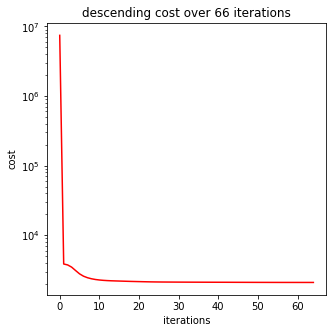

iter: 66 
cost: 2096.06021046 
[7442269.8363673789, 3860.5189186078592, 3741.7557147763896, 3480.716463333536, 3108.5921394017578, 2786.3131406639918, 2578.0696570360651, 2451.2367441771803, 2368.2182624841903, 2311.4891488647418, 2273.1181856506487, 2246.7647055820094, 2228.0456551239818, 2214.4042616641491, 2204.3048088937226, 2195.4783746850835, 2186.4542222656196, 2177.2567181098557, 2168.8478811087257, 2161.7466426821056, 2154.9862956024144, 2148.2563447831667, 2141.7203089236027, 2136.1052459328735, 2131.8197981837779, 2128.6589269768265, 2125.9002407052853, 2123.803248090197, 2122.1271896236326, 2120.5994773709072, 2119.0040277235385, 2117.7303697293446, 2116.555697181193, 2115.4444573307405, 2114.3840981686053, 2113.4204955421314, 2112.5106878932775, 2111.6394425548701, 2110.7972176161934, 2109.8812948801751, 2109.1138593866499, 2108.5031102583944, 2107.9230902724853, 2107.2126843218134, 2105.8058265446311, 2104.9009789474458, 2104.1676487446225, 2103.3846678196542, 2102.533430

In [793]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def calc_cost(A, B):
    '''cost funktion -> sum(A-B)^2'''
    return np.sum(np.square(A - B))

#print calc_cost(matrix_A, matrix_B)

def nnmf(A, m, it, threshhold=2):
    (r, c) = A.shape
        
    H = np.matrix(np.random.random((m, c)))
    W = np.matrix(np.random.random((r, m)))
    
    costs = []
    
    for i in range(it): 
        #Berechne aktuelles Produkt  B=W∗H
        B = W * H
        
        #Abbruchbedingung
        if len(costs) > 10 and (costs[-10] - costs[-1]) < threshhold:
            print "stagnation after", i+1, "iterations\n"
            break
        
        # Berechnung der Kosten
        costs.append(calc_cost(A, B))
        
        #Anpassung der Matrix  H
        H = np.multiply(H, (W.T * A)/(W.T*W*H))
        #Anpassung der Matrix  W
        W = np.multiply(W, (A * H.T)/(W*H*H.T))

    if it - 1 == i:
        print "reached max iterations\n"
    
    return (H, W, costs, i+1)


def cost(A, B):
    return np.sum(np.square(A - B))
    
H, W, costs, iterations = nnmf(A, 30, 200)

 # plot curve
plt.figure(figsize=(5, 5))
plt.plot(range(iterations-1), costs, '-k', c='r')
plt.yscale('log')
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title(('descending cost over %d' % iterations + ' iterations'))
plt.show()
    
print 'iter:',iterations, '\ncost:', costs[-1],"\n",costs, "\nH:\n",H,'\nW:\n',W

## Anzeige der Merkmale und der Gewichte

Im vorigen Abschnitt wurde die Merkmalsmatrix $H$ und die Gewichtsmatrix $W$ berechnet. Diese Matrizen können natürlich am Bildschirm ausgegeben werden, was jedoch nicht besonders informativ ist. Aus den Matrizen können jedoch die Antworten für die folgenden interessanten Fragen berechnet werden:

* In welchen Artikeln sind welche Merkmale stark vertreten?
* Wie lassen sich die insgesamt $m$ Merkmale beschreiben, so dass aus dieser Merkmalsbeschreibung klar wird, welches Thema den Artikeln, in denen das Merkmal stark vertreten ist, behandelt wird? 
 
Die Antwort auf die erste Frage ergibt sich aus der Gewichtsmatrix $W$. Für die Beantwortung der zweiten Frage wird die Merkmalsmatrix $H$ herangezogen.

### Beschreibung der Merkmale

Die Merkmalsmatrix $H$ beschreibt, wie stark die Worte aus _wordvec_ in jedem Merkmal enthalten sind. Jede Zeile von $H$ gehört zu einem Merkmal, jede Spalte von $H$ gehört zu einem Wort in _wordvec_.

Es bietet sich an jedes Merkmal einfach durch die $N=6$ Wörter aus _wordvec_ zu beschreiben, welche am stärksten in diesem Merkmal enthalten sind. Hierzu muss für jedes Merkmal die entsprechende Zeile in $H$ nach den $N=6$ größten Werten durchsucht bzw. geordnet werden. Die entsprechenden Spalten dieser Matrixelemente verweisen dann auf die $N=6$ wichtigsten Worte des Merkmals.

Tipp für die Implementierung: Legen Sie für jedes Merkmal $i$ eine Liste an. Die Listenlänge ist durch die Anzahl der Worte in _wordvec_ (d.h. die Anzahl der Spalten in $H$) gegeben. Jedes Listenelement $j$ enthält selbst wieder 2 Elemente: An erster Stelle den entsprechenden Wert $H_{i,j}$ der Merkmalsmatrix, an der zweiten Stelle das $j.$-te Wort in _wordvec_. Nachdem die Liste angelegt ist, kann sie mit _listname.sort()_ in aufsteigender Reihenfolge sortiert werden. Die abnehmende Sortierung erhält man mit _listname.sort().reverse()_. Danach geben die $N=6$ ersten Listenelemente die für das Merkmal $i$ wichtigsten Worte an.

### Präsenz der Merkmale in den Artikeln

Die Gewichtsmatrix $W$ beschreibt, wie stark die $m$ Merkmale in den Artikeln aus _articletitles_ enthalten sind. Jede Zeile von $W$ gehört zu einem Artikel, jede Spalte von $W$ gehört zu einem Merkmal.
Die Berechnung der $M=2$ gewichtigsten Merkmale für jeden Artikel in _articletitles_ kann analog zu der oben beschriebenen Berechnung der $N=6$ wichtigsten Worte eines Merkmals berechnet werden.

### Implementierung

Implementieren Sie eine Funktion _showfeatures(w,h,titles,wordvec)_, welche wie oben beschrieben für jeden Artikel die $M=2$ wichtigsten Merkmale am Bildschirm ausgibt. Dabei soll jedes Merkmal durch die 6 wichtigsten Wörter dieses Merkmals angegeben werden. Siehe Beispielausgabe unten.  

Übergabeparameter der Funktion sind die Merkmalsmatrix $H$, die Gewichtungsmatrix $W$, die Liste aller Artikeltitel _articletitles_ und die Liste aller Worte _wordvec_.


Beispiel fuer Ausgabe:

[(13.54131155883748, 13, u'Putin vows payback after confirmation of Egypt plane bomb'),

(2.2466669548146254, 9, u'Putin vows payback after confirmation of Egypt plane bomb')]

----- ['plane', 'egypt', 'russia', 'month', 'killing', 'putin']

----- ['airport', 'russian', 'crash', 'egypt', 'security', 'officials']

Die Ausgabe ist wie folgt zu interpretieren:
* Für den Artikel _Putin vows payback after confirmation of Egypt plane bomb_ ist 
    * das wichtigste Merkmal durch die 6 Wörter _plane_, _egypt_, _russia_, _month_, _killing_, _putin_ definiert. Das Gewicht dieses Merkmals im Artikel ist 13.54
    * das zweitwichtigste Merkmal durch die 6 Wörter _airport_, _russian_, _crash_, _egypt_, _security_, _officials_ definiert. Das Gewicht dieses Merkmals im Artikel ist 2.24

In [794]:
# Beschreibung der Merkmale

def get_the_biggest(indexed_features, n):
    sorted_list = sorted(indexed_features, key=lambda value: value[1], reverse=True)
    biggest = []
    for i in range(0,n):
        biggest.append(sorted_list[i])
    return biggest

def get_index_list(feature):
    indexed_list = []
    index = 0
    for value in feature:
        indexed_list.append((index,value))
        index +=1
    return indexed_list

def find_important_features(matrix, n):
    important_feature_list = []
    for feature in matrix:
        indexed_list = get_index_list(feature)
        biggest_six = get_the_biggest(indexed_list, n)
        important_feature_list.append(biggest_six)
    return important_feature_list

def match_words(featured_H, article_tuple, word_list):
    words = []
    for word_tuple in featured_H[article_tuple]:
        words.append(word_list[word_tuple[0]])
    return words

# Implementierung
def showfeatures(W,H,titles,wordvec):
    word_list = wordvec.keys()
    featured_H = find_important_features(H, 6)
    featured_W = find_important_features(W, 2)
    index = 0
    for article_tuples in featured_W:
        j = 0
        for article_tuple in article_tuples:
            print article_tuples[j], titles[index]
            j += 1
        
        for article_tuple in article_tuples:
            print match_words(featured_H, article_tuple[0], word_list)

        print "______________", '\n'
        index +=1
    return 0

print showfeatures(np.array(W),np.array(H),articletitles,allwords)

(1, 23.690699142430276) Ballistic missile warning sent in error by Hawaii authorities
(23, 7.6194597904586212) Ballistic missile warning sent in error by Hawaii authorities
[u'hawaii', u'warn', u'emerg', u'ballist', u'mistaken', u'resid']
[u'hawaii', u'alert', u'missil', u'threat', u'error', u'ballist']
______________ 

(12, 27.949998251959872) Saudi Prince Alwaleed in settlement talks with government: sources
(22, 0.37591316542628178) Saudi Prince Alwaleed in settlement talks with government: sources
[u'saudi', u'settlement', u'princ', u'alwale', u'arabia', u'jeddah']
[u'program', u'resum', u'block', u'govern', u'request', u'immigr']
______________ 

(22, 26.820971372500001) U.S. resumes DACA applications after judge blocks end to program
(18, 0.1336114124251073) U.S. resumes DACA applications after judge blocks end to program
[u'program', u'resum', u'block', u'govern', u'request', u'immigr']
[u'immigr', u'countri', u'remark', u'centuri', u'trump', u'law']
______________ 

(0, 21.4391

[u'live', u'night', u'murray', u'bannon', u'bill', u'joe']
[u'hawaii', u'alert', u'missil', u'threat', u'error', u'ballist']
______________ 

(15, 0.085800547618741396) Australian Open Begins a Challenging Season in Tennis
(9, 0.041529592658249223) Australian Open Begins a Challenging Season in Tennis
[u'state', u'attack', u'unit', u'staff', u'claim', u'octob']
[u'vote', u'brexit', u'campaign', u'farag', u'london', u'britain']
______________ 

(14, 1.6876526735880883) ‘Saturday Night Live,’ With Help From Old Friends, Skewers ‘Morning Joe’
(20, 0.17380805062865229) ‘Saturday Night Live,’ With Help From Old Friends, Skewers ‘Morning Joe’
[u'merkel', u'coalit', u'germani', u'social', u'schulz', u'angela']
[u'emerg', u'system', u'alert', u'nation', u'oper', u'feder']
______________ 

(29, 4.0627156688523645) Nonfiction: The Outlaw Novelist as Literary Critic
(21, 0.92304636193329437) Nonfiction: The Outlaw Novelist as Literary Critic
[u'detroit', u'auto', u'pickup', u'show', u'segment', u

In [790]:
topics = 5
num_iterations = 200

#showfeatures
#gibt 2 wichtigsten merkmale aus
#jedes merkmal mit 6 wörten
def showfeatures(w, h, titles, wordvec, topic_words=6, features_count=2):
    
    sorted_articlefeatures = [sorted(zip(article, range(len(article))), reverse=True)[:features_count] for article in np.array(w)]
    article_features = zip(sorted_articlefeatures, titles)
    
    features = [(sorted(zip(feature, wordvec), reverse=True))[:topic_words] for feature in np.array(h)]
    
    confident_count = 0
    unconfident_count = 0
    
    for feature_weights, title in article_features:
        if feature_weights[0][0] < 3:
            print title, '| confident: 👎'
            unconfident_count += 1
        else:
            print title, '| confident: 👍'
            confident_count += 1
        #print title
        for weight, idx in feature_weights:
            print '↳', '%2s' % idx,  ':', weight, zip(*features[idx])[1]
        print ''
    
    print  confident_count, 'times confident 👍'
    print  unconfident_count, 'times unconfident 👎'
    
    return features
    
def run_nnmf(topic_count, iterations, rssfeeds, topic_words=6, features_count=2):
        allwords,articlewords,articletitles = getarticlewords(rssfeeds)
        A, wordsvec = makematrix(articlewords,allwords)
        H, W, costs, iterations = nnmf(A, topic_count, iterations)
        features = showfeatures(W, H, articletitles, wordsvec, topic_words, features_count)
        
run_nnmf(topics, num_iterations, rssfeeds, 6, 2)
#showfeatures(W, H, articletitles, allwords.keys())

stagnation after 30 iterations

Ballistic missile warning sent in error by Hawaii authorities | confident: 👍
↳  3 : 9.10145551974 (u'hawaii', u'alert', u'missil', u'ballist missil', u'ballist', u'emerg')
↳  0 : 0.328559251712 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')

Saudi Prince Alwaleed in settlement talks with government: sources | confident: 👎
↳  0 : 1.37062787775 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')
↳  2 : 1.10344152959e-08 (u'stoughton', u'hire', u'time', u'line', u'releas', u'prison')

U.S. resumes DACA applications after judge blocks end to program | confident: 👎
↳  0 : 1.93939440298 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')
↳  3 : 0.447257824232 (u'hawaii', u'alert', u'missil', u'ballist missil', u'ballist', u'emerg')

U.S. ultimatum on nuclear deal, new sanctions draw Iran threat | confident: 👍
↳  1 : 5.09611589708 (u'trump', u'presid', u'iran', u'donald trump', u'donald', u'deal')
↳  0 : 0.904949025285 (

↳  0 : 0.215512761386 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')

Tillerson tells State Department staff 'values matter' | confident: 👍
↳  0 : 3.5882281934 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')
↳  1 : 3.02778048478 (u'trump', u'presid', u'iran', u'donald trump', u'donald', u'deal')

7 hip-hop stars making America 'woke' again | confident: 👎
↳  1 : 1.81703653365 (u'trump', u'presid', u'iran', u'donald trump', u'donald', u'deal')
↳  0 : 0.166728497664 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')

Live lobster boiling outlawed | confident: 👎
↳  4 : 0.179314629448 (u'korea', u'south', u'south korea', u'women', u'ban', u'abort')
↳  1 : 0.114055428131 (u'trump', u'presid', u'iran', u'donald trump', u'donald', u'deal')

21-year-old dies from flu complications | confident: 👎
↳  0 : 0.0246513176605 (u'state', u'oil', u'burn', u'tanker', u'oil tanker', u'china')
↳  1 : 0.00599685421901 (u'trump', u'presid', u'iran', u'donald trump

## Aufgaben

1\. Analysieren Sie die berechneten Topics indem Sie sich überlegen ob die gefundenen 6 Wörter pro Topic wirklich Themen beschreiben.

In [ ]:

zahlen

2\. Verändern Sie die Parameter der NNMF (Anzahl der Topics $m$, Anzahl der Iterationen). Bei welcher Einstellung der Parameter erhalten Sie das für sie sinnvollste Resultat (sinnvolle Topics)?

3\. Wie kann die _getwords()_ Methode verbessert werden, so dass noch bedeutsamere Topics gefunden werden? 
* Hauptsächlich Nomen nutzen